In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# MNIST IMAGE --> Tensors

In [5]:
transform = transforms.ToTensor()

In [7]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [8]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [12]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
type(train_data[0])

tuple

In [14]:
image,label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [15]:
label

5

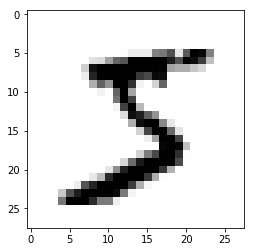

In [17]:
plt.imshow(image.reshape(28,28), cmap='gist_yarg')

In [18]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [20]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # Formatting

In [21]:
# First batch
for images, labels in train_loader:
    # 60,000 
    break

In [23]:
images.shape

torch.Size([100, 1, 28, 28])

In [24]:
labels.shape

torch.Size([100])

In [25]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


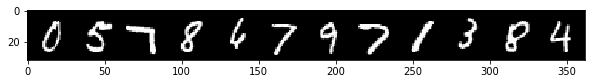

In [27]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())
# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10, 4))
# We need to tranpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [28]:
class MultiLayerPerceptron(nn.Module):
    
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self, X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1) # Multiclass classification

In [30]:
torch.manual_seed(100)
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
# ANN ---> CNN
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [32]:
# 105,214 total parameters

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
images.shape # --> [100, 784]

torch.Size([100, 1, 28, 28])

In [36]:
images.view(100, -1).shape

torch.Size([100, 784])

In [38]:
import time
start_time = time.time()

# Training

epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch {b} loss:{loss.item()} accuracy: {acc}')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500, -1))
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch 200 loss:0.09727836400270462 accuracy: 94.94
Epoch 0 batch 400 loss:0.10154809802770615 accuracy: 95.0575
Epoch 0 batch 600 loss:0.19749844074249268 accuracy: 95.28333333333333
Epoch 1 batch 200 loss:0.07884561270475388 accuracy: 96.45
Epoch 1 batch 400 loss:0.08209731429815292 accuracy: 96.655
Epoch 1 batch 600 loss:0.1971932053565979 accuracy: 96.645
Epoch 2 batch 200 loss:0.12399470061063766 accuracy: 97.385
Epoch 2 batch 400 loss:0.10860365629196167 accuracy: 97.335
Epoch 2 batch 600 loss:0.03336619585752487 accuracy: 97.39833333333333
Epoch 3 batch 200 loss:0.03871791437268257 accuracy: 98.02
Epoch 3 batch 400 loss:0.041090697050094604 accuracy: 97.9825
Epoch 3 batch 600 loss:0.09857228398323059 accuracy: 97.96333333333334
Epoch 4 batch 200 loss:0.11112187057733536 accuracy: 98.52
Epoch 4 batch 400 loss:0.16598063707351685 accuracy: 98.5025
Epoch 4 batch 600 loss:0.02048896998167038 accuracy: 98.36
Epoch 5 batch 200 loss:0.031815093010663986 accuracy: 98.9
Epoch 5 ba

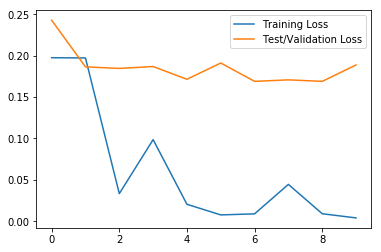

In [39]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test/Validation Loss")
plt.legend()

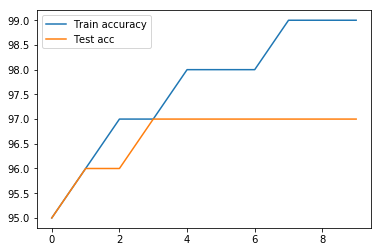

In [42]:
train_acc = [t/600 for t in train_correct]
test_acc = [t/100 for t in test_correct]

plt.plot(train_acc, label="Train accuracy")
plt.plot(test_acc, label="Test acc")
plt.legend()

In [43]:
# New UNSEEN data
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [44]:
with torch.no_grad():
    
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()
        

In [45]:
correct.item()/len(test_data) * 100

97.71

In [46]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    5,    0,    4,    3,    5,    1,    4,    1],
       [   0, 1122,    1,    1,    1,    1,    2,    4,    0,    2],
       [   1,    5, 1013,    8,    0,    0,    1,    6,    2,    0],
       [   1,    0,    1,  977,    1,   11,    1,    0,    2,    2],
       [   1,    0,    1,    0,  956,    1,    3,    1,    3,   13],
       [   0,    0,    0,    1,    0,  856,    1,    1,    2,    3],
       [   1,    3,    1,    0,    7,   12,  941,    0,    1,    0],
       [   1,    0,    6,    6,    4,    1,    2, 1007,    6,    4],
       [   3,    5,    4,    9,    0,    3,    2,    1,  947,    4],
       [   0,    0,    0,    8,    9,    4,    0,    7,    7,  980]],
      dtype=int64)